In [1]:
#from functions_load import call_remote_file_ssh
from functions_analysis import loader, total, repeatedSynID_remover, persyn, fuse_clusters
import pandas as pd
from scipy.spatial.distance import pdist, squareform


In [2]:
csv_file_path = '/home/gerard/nextcloud/analysis/synaptic_computation/results/NOr_02.21.2020_Data1.csv'
evtype = 1 # synch evs
singleSynFlag = [0, 226261]
grapherFlag = True
clusteringFlag = True
clusteringAlgorithmFlag = 1
fuse_clusters_flag = False
plotFlag = True
fusedClustersFlag = fuse_clusters_flag
Selfpos = False

# def total(
#         csv_file_path,
#         evtype,
#         singleSynFlag,
#         clusteringFlag,
#         fuse_clusters_flag,
#         grapherFlag,
#         fusedClustersFlag,
#         clusteringAlgorithmFlag,
#         plotFlag,
#         Selfpos,

#           ):


no repeated synIDs


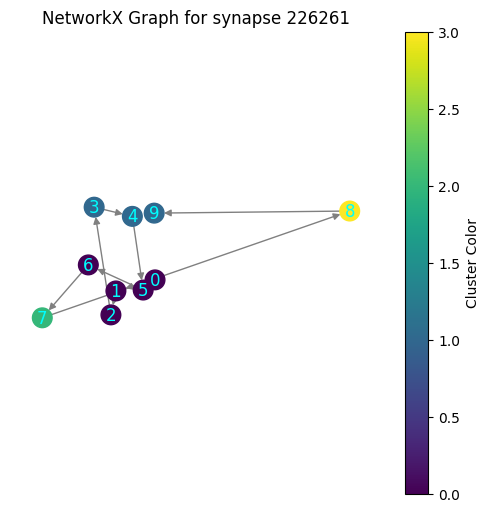

In [3]:
df = total(
        csv_file_path,
        evtype,
        singleSynFlag,
        clusteringFlag,
        fuse_clusters_flag,
        grapherFlag,            # print('here ', len(df_syn['cluster']), len(list(pos.keys())))

        fusedClustersFlag,
        clusteringAlgorithmFlag,
        plotFlag,
        Selfpos
          )


no repeated synIDs


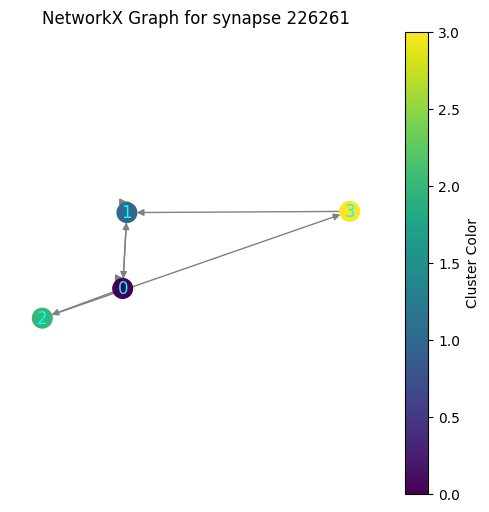

In [4]:
fuse_clusters_flag = True
fusedClustersFlag = fuse_clusters_flag
singleSynFlag = [0, 226261]

df = total(
        csv_file_path,
        evtype,
        singleSynFlag,
        clusteringFlag,
        fuse_clusters_flag,
        grapherFlag,
        fusedClustersFlag,
        clusteringAlgorithmFlag,
        plotFlag,
        Selfpos
          )


In [5]:
#fuse_clusters(df)

In [6]:
df.to_csv('/home/gerard/nextcloud/analysis/synaptic_computation/results/NOr_02.21.2020_Data1_3.csv', index=True)
# df4.to_csv('/home/gerard/nextcloud/analysis/synaptic_computation/results/df4.csv', index=True)

In [7]:
# print(df3)

In [8]:
pixel_size = 86.6667
eps_nm = 50
eps = eps_nm / pixel_size   # Maximum distance between samples to be considered part of the same cluster
print(eps, 'Maximum distance between samples to be considered part of the same cluster')

mask_ID = (df['synID'] == singleSynFlag[1])
df_syn = df.loc[mask_ID]

if df_syn.iloc[-1]['synID'] == df_syn.iloc[0]['synID']:
    points = df_syn[['x', 'y']]

    # Compute pairwise distances using Euclidean distance
    distances = pdist(points.values, metric='euclidean')

    # Convert to squareform to get the condensed distance matrix
    condensed_matrix = squareform(distances)
    print(condensed_matrix)
    print

0.5769228550296711 Maximum distance between samples to be considered part of the same cluster
[[0.         0.         0.         0.78471028 0.78471028 0.
  0.         0.88449244 2.47490241 0.78471028]
 [0.         0.         0.         0.78471028 0.78471028 0.
  0.         0.88449244 2.47490241 0.78471028]
 [0.         0.         0.         0.78471028 0.78471028 0.
  0.         0.88449244 2.47490241 0.78471028]
 [0.78471028 0.78471028 0.78471028 0.         0.         0.78471028
  0.78471028 1.3966121  2.29984035 0.        ]
 [0.78471028 0.78471028 0.78471028 0.         0.         0.78471028
  0.78471028 1.3966121  2.29984035 0.        ]
 [0.         0.         0.         0.78471028 0.78471028 0.
  0.         0.88449244 2.47490241 0.78471028]
 [0.         0.         0.         0.78471028 0.78471028 0.
  0.         0.88449244 2.47490241 0.78471028]
 [0.88449244 0.88449244 0.88449244 1.3966121  1.3966121  0.88449244
  0.88449244 0.         3.35917013 1.3966121 ]
 [2.47490241 2.47490241 2.

In [9]:
from scipy.spatial.distance import squareform
import numpy as np



# Iterate through the elements of the square distance matrix
for i in range(condensed_matrix.shape[0]):
    for j in range(i + 1, condensed_matrix.shape[1]):  # Only consider upper triangle
        if condensed_matrix[i, j] < eps:
            print(f"Value {condensed_matrix[i, j]} is smaller than {eps}")
            print(f"Row index: {i}, Column index: {j}")


Value 0.0 is smaller than 0.5769228550296711
Row index: 0, Column index: 1
Value 0.0 is smaller than 0.5769228550296711
Row index: 0, Column index: 2
Value 0.0 is smaller than 0.5769228550296711
Row index: 0, Column index: 5
Value 0.0 is smaller than 0.5769228550296711
Row index: 0, Column index: 6
Value 0.0 is smaller than 0.5769228550296711
Row index: 1, Column index: 2
Value 0.0 is smaller than 0.5769228550296711
Row index: 1, Column index: 5
Value 0.0 is smaller than 0.5769228550296711
Row index: 1, Column index: 6
Value 0.0 is smaller than 0.5769228550296711
Row index: 2, Column index: 5
Value 0.0 is smaller than 0.5769228550296711
Row index: 2, Column index: 6
Value 0.0 is smaller than 0.5769228550296711
Row index: 3, Column index: 4
Value 0.0 is smaller than 0.5769228550296711
Row index: 3, Column index: 9
Value 0.0 is smaller than 0.5769228550296711
Row index: 4, Column index: 9
Value 0.0 is smaller than 0.5769228550296711
Row index: 5, Column index: 6
